In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score
import pickle

# Importation des données

In [4]:
data=pd.read_csv("train_u6lujuX_CVtuZ9i.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Infos sur nos données:

In [7]:
data.shape

(614, 13)

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [9]:
data.isnull().sum().sort_values(ascending=False)#identiffier le nombre des valeurs manquantes pour chaque colonne our commencer le nettoyage

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
Gender               13
Married               3
Loan_ID               0
Education             0
ApplicantIncome       0
CoapplicantIncome     0
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
data.describe()#statistique des variable quantitatif

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [11]:
data.describe(include=['object'])#statistique des variable qualitatif

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


# Nettoyage de nos données

In [12]:
#separer les varibles qualitatif et quantitatif
data_quantitatife=[]
data_qualitatif=[]
for i, c in enumerate (data.dtypes):
  if c==object:
    data_qualitatif.append(data.iloc[:,i])
  else:
    data_quantitatife.append(data.iloc[:,i])

In [13]:
#mettre les listes des variables dans un datafram
data_qualitatif=pd.DataFrame(data_qualitatif).transpose()
data_quantitatife=pd.DataFrame(data_quantitatife).transpose()

In [14]:
data_qualitatif.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y


In [15]:
data_quantitatife.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0


In [16]:
# remplacer les valeurs manquantes par les valeurs qui se repetent le plus
# (uniquement pour les variables qualitatif)
data_qualitatif=data_qualitatif.apply(lambda x:x.fillna(x.value_counts().index[0]))
data_qualitatif.isnull().sum().any()

False

In [17]:
#pour les variables quantitatifs
data_quantitatife.fillna(method='bfill',inplace=True)
data_quantitatife.isnull().sum().any()

C:\Users\bignetwork\AppData\Local\Temp\ipykernel_21412\2570133438.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_quantitatife.fillna(method='bfill',inplace=True)


False

In [18]:
#On peut remplacer les variabe target par de valeurs numreique manuellement
target_value={'Y':1,'N':0}
target=data_qualitatif['Loan_Status']
data_qualitatif.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [19]:
#en utulisant labelencoder de scikit learn on peut remplacer le variable qualitatifs par des valeurs numérique
le=LabelEncoder()
for i in data_qualitatif.columns:
  data_qualitatif[i]=le.fit_transform(data_qualitatif[i])

In [20]:
data_qualitatif.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2


In [21]:
#supprimer la colonne ID 
data_qualitatif.drop('Loan_ID',axis=1,inplace=True)

In [22]:
#Concatenations des variables quqlitatif et quantitatif et specifier la colonne target
X=pd.concat ([data_qualitatif,data_quantitatife],axis=1)
y=target

In [23]:
df=pd.concat([data_quantitatife,data_qualitatif,Y],axis=1)
df

NameError: name 'Y' is not defined

# Analyse exploratoire

le pourcentage de creadit accordé est :68.72964169381108 %
le pourcentage de creadit non accordé est :31.27035830618892 %


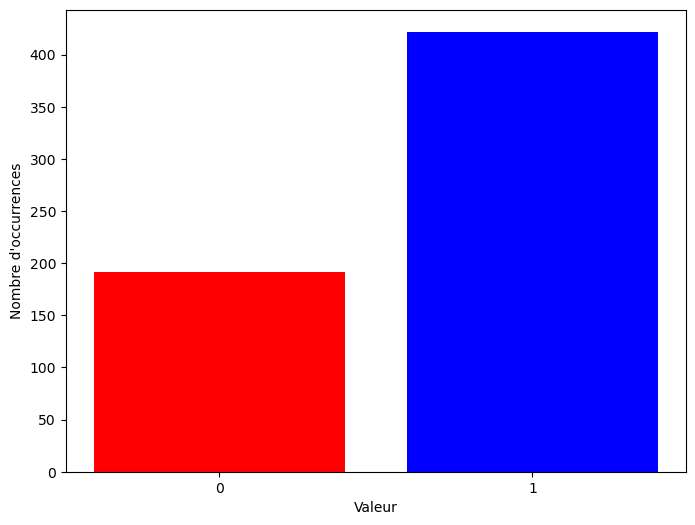

In [24]:
plt.figure(figsize=(8,6))
plt.bar(target.value_counts().index, target.value_counts().values, color=['blue', 'red'])
yes=(target.value_counts()[1]/len(target))*100
no=(target.value_counts()[0]/len(target))*100
print(f'le pourcentage de creadit accordé est :{yes} %')
print(f'le pourcentage de creadit non accordé est :{no} %')
plt.xlabel('Valeur')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(target.value_counts().index, ['1', '0'])
plt.show()

In [45]:
#creadit_history
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')

NameError: name 'df' is not defined

In [ ]:
#sexe
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')

In [ ]:
#Marrié ou pas
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')

In [ ]:
#Education
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')

In [ ]:
#revenue du demandeur
plt.scatter (df['ApplicantIncome'],df['Loan_Status']) 

In [ ]:
#revenue du cojoint de demandeur
plt.scatter (df['CoapplicantIncome'],df['Loan_Status']) 

In [ ]:
df.groupby('Loan_Status').median()

# Devlopemment du model

In [26]:
#division de nos données
X_2=X[['Credit_History','CoapplicantIncome','ApplicantIncome','Gender','Married']]
X_train, X_test, y_train, y_test = train_test_split(X_2, y, test_size=0.2, random_state=42)

In [27]:
#on va utilisé trois models KNN,regression logistique et l'arbre de decision et on choisis le model avac la meilleur precision
knn = KNeighborsClassifier()
logistic_reg = LogisticRegression(random_state=42)
tree = DecisionTreeClassifier(max_depth=1,random_state=42)


In [28]:
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else :
        print (f'la precision de modél est {acc}')

In [29]:
def knn_eval(knn,X_train,X_test,y_train ,y_test):
    knn.fit (X_train,y_train)
    precesion=accu(y_test,knn.predict(X_test))
    return precesion
    


In [30]:
knn_eval (knn,X_train,X_test,y_train ,y_test)

la precision de modél est 0.5772357723577236


In [31]:
def logistic_reg_eval(logistic_reg,X_train,X_test,y_train ,y_test):
    logistic_reg.fit (X_train,y_train)
    precesion=accu(y_test,logistic_reg.predict(X_test))
    return precesion
    


In [32]:
logistic_reg_eval(logistic_reg,X_train,X_test,y_train ,y_test)

la precision de modél est 0.7886178861788617


In [33]:
def tree_eval(tree,X_train,X_test,y_train ,y_test):
    tree.fit (X_train,y_train)
    precesion = accu(y_test, tree.predict(X_test))
    return precesion
    

In [34]:
tree_eval(tree,X_train,X_test,y_train ,y_test)

la precision de modél est 0.7967479674796748


on voit ici que le meilleur model pour nos données est l'arbre de decision

In [41]:
Classificateur=LogisticRegression(random_state=42)

In [42]:
Classificateur.fit(X_2,y)

LogisticRegression(random_state=42)

In [44]:
#enregistrer le modél
pickle.dump(Classificateur,open ('model2.pkl','wb'))